In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(xl:np.array,yl:np.array)->float:
    if len(xl)!=len(yl):
        raise ValueError("The length of the x and y arrays must be the same")
    if len(xl)<=1:
        return yl[0]
    else:
        return (f(xl[1::],yl[1::])-f(xl[0:-1:],yl[0:-1:]))/(xl[-1]-xl[0])
    
def NewtonCoefficients(xl:np.array,yl:np.array)->np.array:
    return [f(xl[0:n],yl[0:n]) for n in range(1,len(xl)+1)]

def interpolatefunc(x:np.array,xl:np.array,cl:np.array)->np.array:
    y=np.zeros(x.shape)
    for i in range(len(cl)):
        y=y+cl[i]*np.prod([x-xi for xi in xl[:i]],axis=0)
    return y

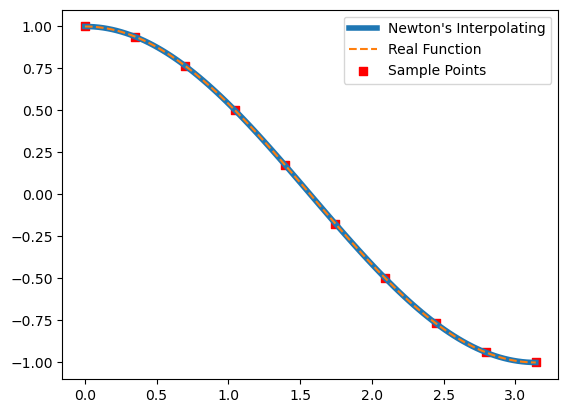

In [18]:
xl=np.linspace(0,np.pi,10)
yl=np.cos(xl)
cl=NewtonCoefficients(xl,yl)
xx=np.linspace(0,np.pi,100)
xn=np.array([xx**n for n in range(len(xl))  ])
plt.plot(xx,interpolatefunc(xx,xl,cl),linewidth=4)
plt.plot(xx,np.cos(xx),linestyle="--")
plt.scatter(xl,yl,marker="s",color="red")
plt.legend(["Newton's Interpolating","Real Function","Sample Points"])


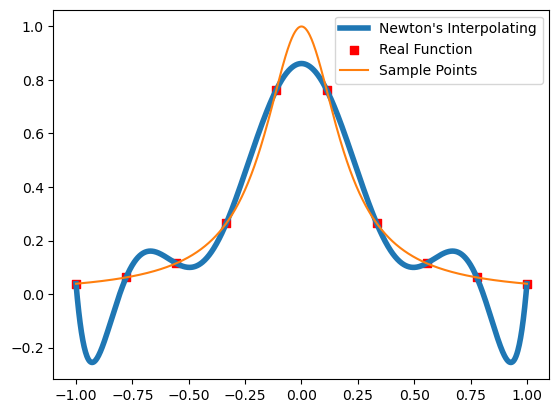

In [19]:
xl=np.linspace(-1,1,10)
yl=1/(1+25*xl**2)
cl=NewtonCoefficients(xl,yl)
xx=np.linspace(-1,1,1000)
xn=np.array([xx**n for n in range(len(xl))  ])
plt.plot(xx,interpolatefunc(xx,xl,cl),linewidth=4)
plt.scatter(xl,yl,marker="s",color="red")
plt.plot(xx,1/(1+25*xx**2))
plt.legend(["Newton's Interpolating","Real Function","Sample Points"])